# **K means Clustering**

Кластеризація K-Means — це алгоритм неконтрольованого машинного навчання , який групує набір даних без міток у різні кластери.

Метою практичної роботи є вивчення основ і роботи кластеризації k середніх разом із реалізацією.

# Поняття кластеризації

Мета кластеризації полягає в тому, щоб розділити генеральну сукупність або набір точок даних на декілька груп, щоб точки даних у кожній групі були більш порівнянними між собою та відрізнялися від точок даних в інших групах. По суті, це групування речей на основі того, наскільки вони схожі та відмінні один від одного.

#Загальне уявлення про алгоритм K-means Clustering?

Машинне навчання без вчителя — це процес навчання комп’ютера використанню немаркованих, несекретних даних і надання алгоритму можливості працювати з цими даними без вчителя. Без будь-якого попереднього навчання даних завдання машини в цьому випадку полягає в організації несортованих даних відповідно до паралелей, шаблонів і варіацій.

Алгоритм кластеризації Kmeans призначає точки даних одному з K кластерів залежно від їх відстані від центрів кластерів. Алгоритм починає роботу з випадкового призначення центроїда кластерів у просторі. Потім кожна точка даних призначається одному з кластерів на основі її відстані від центроїда кластера. Після призначення кожної точки одному з кластерів розраховуються нові центроїди кластера. Цей процес виконується ітеративно, доки не буде знайдено хороше розбиття на кластери. Під час аналізу робиться припущення, що кількість кластера відома заздалегідь, тому необхідно поставити точки в одну з груп.

У деяких випадках K не визначено чітко, і ми повинні думати про оптимальну кількість кластерів K.

Кластеризація за алгоритмом Kmeans дає найкращі результати для добре розділениї даних. Якщо точки даних перекриваються, цей алгоритм кластеризація не підходить.

K Means є швидшим порівняно з іншими методами кластеризації. Він базується на припущенні про міцний зв’язок між точками даних в кожному кластері.

Алгоритм Kmeans не надає чіткої інформації щодо якості кластерів. Різне початкове призначення центроїда кластера може призвести до різних наборів  кластерів. Крім того, алгоритм K Means чутливий до шуму, тому він може застрягнути у місцевих мінімумах.

#Основні кроки алгоритму Kmeans

Припустимо, що надано набір елементів із певними ознаками та значеннями для цих ознак (як вектор). Завдання полягає в тому, щоб розділити ці елементи на групи.

Розглягнмо алгоритм неконтрольованого навчання K-means.

«K» у назві алгоритму представляє кількість груп/кластерів, у які ми треба класифікувати елементи, які надано (елементи можна розглядати як точки в n-вимірному просторі).

Алгоритм класифікує елементи в k груп або кластерів подібності. Щоб обчислити цю подібність, ми будемо використовувати евклідову відстань як вимірювання.

Алгоритм роботи наступний:  

1. Спочатку ми випадковим чином ініціалізуємо k точок, які називаються середніми або кластерними центроїдами.

2. Ми класифікуємо кожен елемент відповідно до його найближчого середнього значення та оновлюємо координати середнього значення, які є середніми для елементів, класифікованих у цьому кластері на даний момент.

3. Ми повторюємо процес протягом заданої кількості ітерацій, і в кінці отримуємо кластери.

«Точки», згадані вище, називаються середніми, оскільки вони є середніми значеннями елементів, класифікованих у них. Для ініціалізації цих засобів у нас є багато варіантів.

Інтуїтивно зрозумілим методом є ініціалізація засобів у випадкових елементах у наборі даних.

Інший метод полягає в ініціалізації середніх випадковими значеннями між межами набору даних (якщо для функції x елементи мають значення в [0,3], ми ініціалізуємо середні значеннями для x в [0,3] ).

Наведений вище алгоритм у псевдокоді виглядає наступним чином:

Initialize k means with random values
--> For a given number of iterations:
    
    --> Iterate through items:
    
        --> Find the mean closest to the item by calculating
        the euclidean distance of the item with each of the means
        
        --> Assign item to mean
        
        --> Update mean by shifting it to the average of the items in that cluster


#Демонстрація роботи KMeans Clustering

Імпорт необхідних бібліотек

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

Генерація набору даних.

Створюється три групи даних (centers=3) з двома ознаками (n_features = 2), і одразу будуємо ілюстрацію.

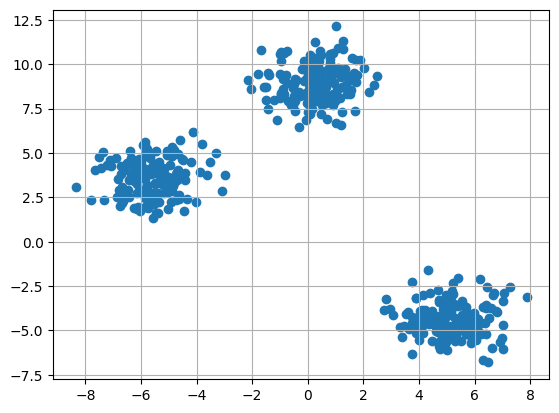

In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()


Створюємо три точки - центри кластерів випадковим чином.

In [ ]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters


{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

Розиіщюжмо на діаграмі створені точки і поряд з ними - згенеровані дані.

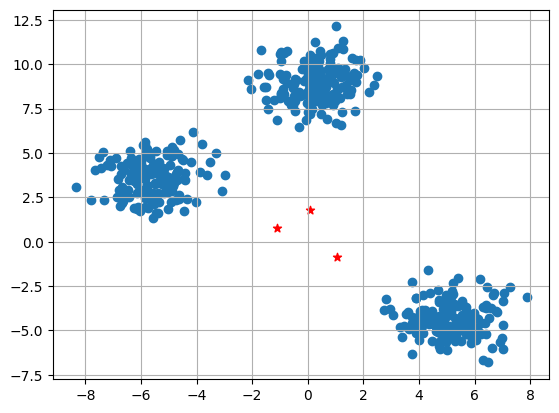

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()


Діаграма відображає точкову діаграму точок даних (X[:,0], X[:,1]) із лініями сітки. Він також позначає початкові центри кластерів (червоні зірки), згенеровані для кластеризації K-середніх.

В наступному блоці коду створюємо функцію для призначення та оновлення центру кластера.

E-крок призначає точки даних найближчому центру кластера.

M-крок оновлює центри кластера на основі середнього значення призначених точок у кластеризації K-means.

In [ ]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [ ]:
#Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters


Створюємо функцію для прогнозування належності точок даних до якогось кластеру.

In [ ]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred


Використовуємо створену функцію для призначення, оновлення та прогнозування центрів кластерів.

In [ ]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

Створюємо ілюстрацію зі згенерованими точками даних і положенням центрів кластерів.

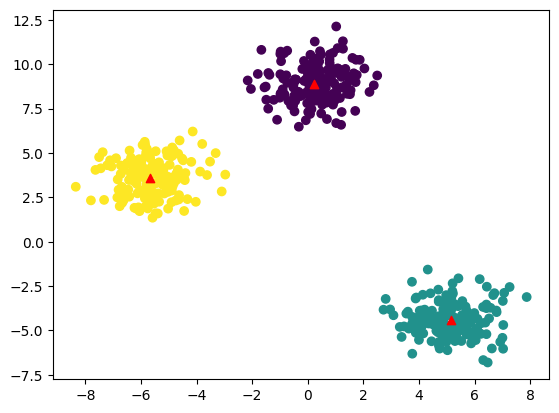

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

На графіку показано точки даних, забарвлені їх прогнозованими кластерами. Червоні маркери представляють оновлені центри кластерів після кроків EM в алгоритмі кластеризації KMeans.

# Побудова розбиття на кластери засобами KMeans у середовищі Scikit-Learn

1. Імпорт необхідних бібліотек

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

2. Генерація даних (кількість точок і кількість центрів може змінюватись!)

In [ ]:
X,y = make_blobs(n_samples = 5000, n_features = 2,centers = 3,random_state = 23)

3. Побудова послідовності наборів кластерів.

In [ ]:
#Find optimum number of cluster
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)


4. Оцінка якості класифікації методами Elbow та Silhouette.

Метод Elbow — це графічний метод для знаходження оптимального значення K в алгоритмі кластеризації k-середніх. Ліктовий графік показує значення суми квадратів у кластері (WCSS) на осі Y, що відповідає різним значенням K (на осі X). Оптимальне значення K – це точка, в якій графік утворює перелом.

Оцінка Silhouette є дуже корисним методом для визначення числа K, коли метод ліктя не показує точку ліктя.

Значення оцінки Silhouette коливається від -1 до 1. Нижче наведено інтерпретацію оцінки Silhouette.

1: Точки ідеально розподілені в кластері, і кластери легко розрізнити.

0: Кластери перекриваються.

-1: точки неправильно призначені в кластери.

Крива Elbow та графіки Silhouette є дуже корисними методами для знаходження оптимального K для кластеризації k-середніх. У реальних наборах даних ви знайдете досить багато випадків, коли кривої Elbow недостатньо, щоб знайти правильне «K». У таких випадках вам слід використовувати графік Silhouette, щоб визначити оптимальну кількість кластерів для вашого набору даних.

Найкраще використовувати обидва методи разом, щоб визначити оптимальне K для кластеризації k-середніх.



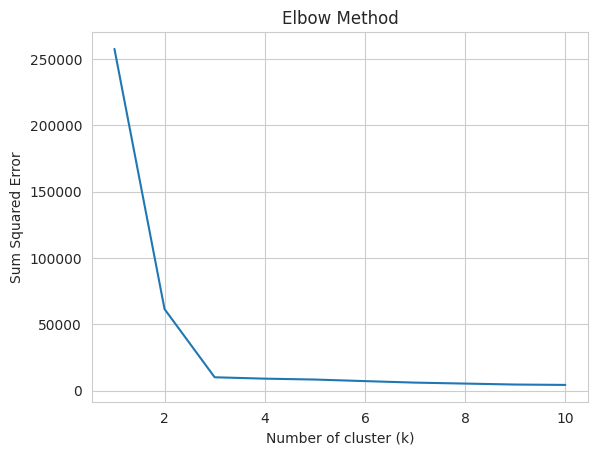

In [ ]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
   kmeans = KMeans(n_clusters=k)
   kmeans.fit(X)
   score = silhouette_score(X, kmeans.labels_)
   silhouette_coefficients.append(score)

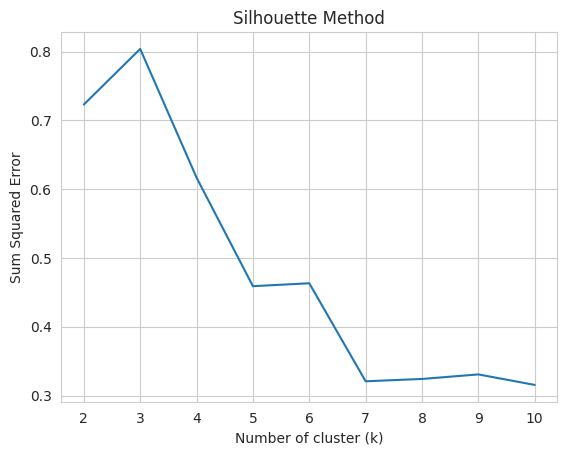

In [ ]:
sns.set_style("whitegrid")
g=sns.lineplot(x=range(2,11), y=silhouette_coefficients)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Silhouette Method')

plt.show()



5. Заповнення кластерів за обраним варіантом.

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=2)

6. Перегляд результатів.

In [ ]:
kmeans.cluster_centers_

array([[ 5.2855625 , -4.3322569 ],
       [-5.61094478,  3.71319307],
       [ 0.27521838,  8.91664035]])

7. Встановлюємо, до якого кластеру належить кожна точка даних.

In [ ]:
pred = kmeans.fit_predict(X)
#pred

8. Побудова графічної ілюстрації.

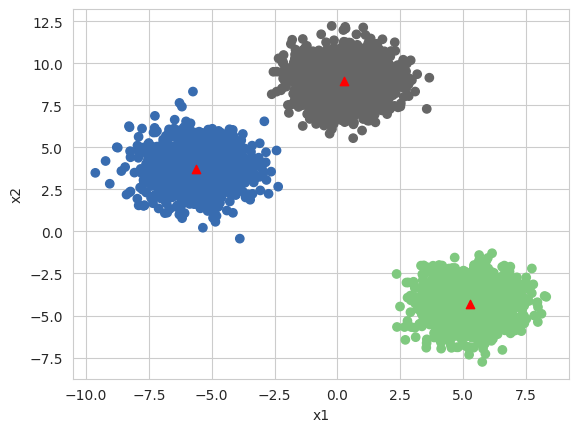

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


# **Завдання**

1. Створити декілька вариантів даних для розбиття на кластери, які відрізняються кількістю центрів, точок.
2. Знайти оптимальну кількість кластерів, проілюструвати результати.
3. За аналогією перевірити інші методи кластеризації (AffinityPropagation, DBSCAN, MeanShift - див. приклади нижче).

# Класифікація виборки make_moon()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

In [ ]:
features, true_labels = make_moons(
   n_samples=250, noise=0.05, random_state=42
)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [23]:
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.5)

# Fit the algorithms to the features
kmeans.fit(scaled_features)
dbscan.fit(scaled_features)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
scaled_features, kmeans.labels_).round(2)


dbscan_silhouette = silhouette_score(
    scaled_features, dbscan.labels_
).round (2)

In [20]:
kmeans_silhouette

0.5

In [24]:
dbscan_silhouette

0.38

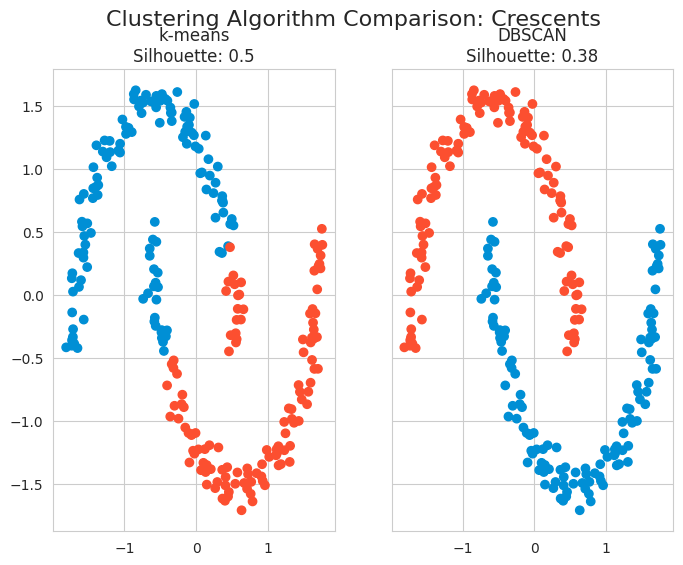

In [25]:
# Plot the data and cluster silhouette comparison
fig, (ax1, ax2) = plt.subplots(
    1, 2, figsize=(8, 6), sharex=True, sharey=True
)
fig.suptitle(f"Clustering Algorithm Comparison: Crescents", fontsize=16)
fte_colors = {
    0: "#008fd5",
    1: "#fc4f30",
}
# The k-means plot
km_colors = [fte_colors[label] for label in kmeans.labels_]
ax1.scatter(scaled_features[:, 0], scaled_features[:, 1], c=km_colors)
ax1.set_title(
    f"k-means\nSilhouette: {kmeans_silhouette}", fontdict={"fontsize": 12}
)

# The dbscan plot
db_colors = [fte_colors[label] for label in dbscan.labels_]
ax2.scatter(scaled_features[:, 0], scaled_features[:, 1], c=db_colors)
ax2.set_title(
    f"DBSCAN\nSilhouette: {dbscan_silhouette}", fontdict={"fontsize": 12}
)
plt.show()

# Приклад кластеризації з використанням DBSCAN

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets


In [27]:
# Load data in X
X, y_true = make_blobs(n_samples=300, centers=4,
					cluster_std=0.50, random_state=0)


['y', 'b', 'g', 'r']


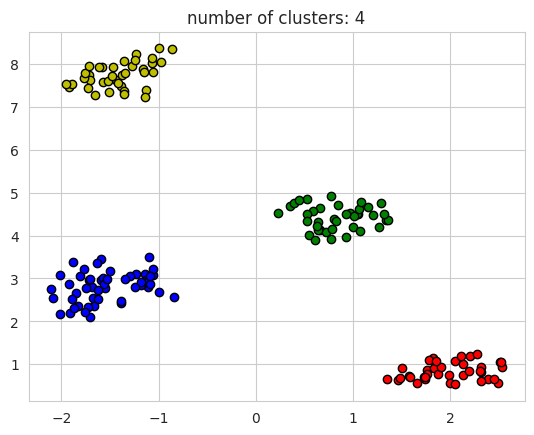

In [28]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# Plot result

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
	if k == -1:
		# Black used for noise.
		col = 'k'

	class_member_mask = (labels == k)

	xy = X[class_member_mask & core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

	xy = X[class_member_mask & ~core_samples_mask]
	plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()


In [29]:
# evaluation metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = adjusted_rand_score(y_true, labels)
print("Adjusted Rand Index: %0.2f" % ari)


Silhouette Coefficient:0.13
Adjusted Rand Index: 0.31
